Stats Models

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
sns.set()

import statsmodels.api as sm


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%load_ext version_information
%version_information pandas, numpy,statsmodels

Software versions
Python 3.7.4 64bit [Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 7.8.0
OS Darwin 19.6.0 x86_64 i386 64bit
pandas 1.1.2
numpy 1.17.2
statsmodels 0.10.1
Sun Dec 06 22:37:38 2020 CET

In [3]:
df = pd.read_excel('../../Data/economics.xlsx')
df.head()


,shortnam,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
0,AFG,0.000000,1.0,NaN,NaN,1.0,2.0,1.0,1.0,93.699997,4.540098,NaN,NaN
1,AGO,8.000000,1.0,5.363636,7.770645,3.0,3.0,0.0,1.0,280.000000,5.634789,-3.411248,1.0
2,ARE,0.000000,1.0,7.181818,9.804219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,60.000004,1.0,6.386364,9.133459,1.0,6.0,3.0,3.0,68.900002,4.232656,-0.872274,1.0
4,ARM,0.000000,0.0,NaN,7.682482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let’s use a scatterplot to see whether any obvious relationship exists between **GDP per capita** (``logpgp95``)and the protection against **expropriation index** (``avexpr``) <br>


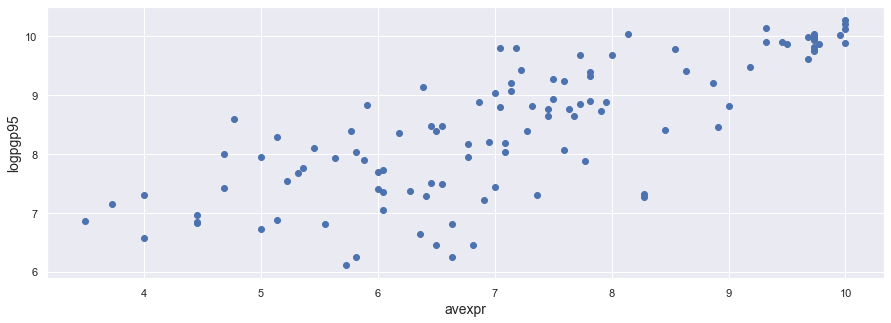

In [4]:
fix,ax = plt.subplots(1,1,figsize=(15,5))
ax.scatter(df['avexpr'], df['logpgp95'])
ax.set_xlabel('avexpr',fontsize=14)
ax.set_ylabel('logpgp95',fontsize=14);

The plot shows a fairly strong positive relationship between protection against expropriation and log GDP per capita.

Specifically, if higher protection against expropriation is a measure of institutional quality, then better institutions appear to be positively correlated with better economic outcomes (higher GDP per capita).

Given the plot, choosing a linear model to describe this relationship seems like a reasonable assumption.

We can write our model as: logpgp95 = $\beta_0$ + $\beta_1 \times $ avexpr


Removing Missing Values

In [5]:
# Dropping NA's is required to use numpy's polyfit
df = df.dropna(subset=['logpgp95', 'avexpr'])

In [6]:
X = df['avexpr']
y = df['logpgp95']

Keeping the country names

In [7]:
labels = df['shortnam']

New Graph

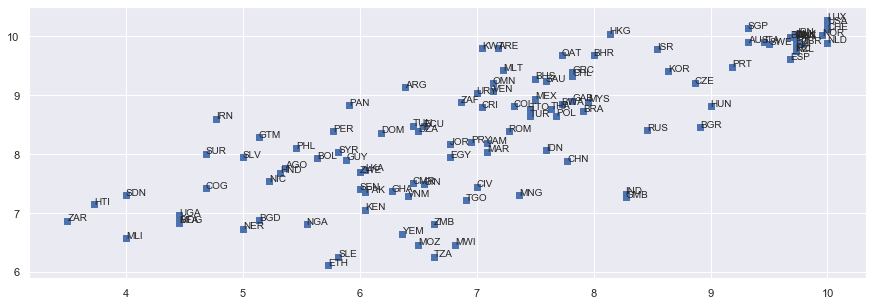

In [8]:
# Replace markers with country labels
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.scatter(X, y, marker='s')

for i, label in enumerate(labels):
    ax.annotate(label, (X.iloc[i], y.iloc[i]))

We can construct our model in statsmodels using the OLS function.

We will use pandas dataframes with statsmodels, however standard arrays can also be used as arguments

In [9]:
df['const']=1

In [10]:
ols = sm.OLS(endog=df['logpgp95'], 
              exog =df[['const', 'avexpr']], 
              missing='drop')

In [11]:
results = ols.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     171.4
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           4.16e-24
Time:                        22:37:39   Log-Likelihood:                -119.71
No. Observations:                 111   AIC:                             243.4
Df Residuals:                     109   BIC:                             248.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6261      0.301     15.391      0.0

From our results, we see that

The intercept  $\beta_0$=4.63.
The slope $\beta_1$=0.53.
The positive $\beta_1$ parameter estimate implies that institutional quality has a positive effect on economic outcomes, as we saw in the figure.<br>

The p-value of 0.000 for $\beta_1$ implies that the effect of institutions on GDP is statistically significant (using p < 0.05 as a rejection rule).
<br>
The R-squared value of 0.611 indicates that around 61% of variation in log GDP per capita is explained by protection against expropriation.
<br>
Using our parameter estimates, we can now write our estimated relationship as
<br>
logpgp95=4.63+0.53 avexpri